In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [27]:
# Carga de datos
df = pd.read_csv('C:\\Users\\camac\\OneDrive\\Escritorio\\Pablo Camacho\\partidos_Grand_Slam (3).csv')

## Creamos la variable objetivo

In [28]:
# Calcula la media de partidos ganados
media_partidos_ganados = df['ST partidos ganados'].mean()

# Crea una nueva columna 'win' que es 1 si el número de partidos ganados es mayor que la media, 0 de lo contrario
df['win'] = (df['ST partidos ganados'] > media_partidos_ganados).astype(int)

# Verificar los valores de la nueva columna 'win'
print(df['win'].value_counts())

win
0    132
1     37
Name: count, dtype: int64


In [29]:
print(df.columns)

Index(['rank', 'name', 'country_name', 'country_id', 'ACES',
       'ST partidos jugados', 'ST partidos ganados',
       'ST juegos saque ganados ', 'ST dobles faltas',
       'ST primer servicio ganado ', 'ST segundo servicio ganado ',
       'ST puntos break contra partido', 'ST puntos totales ganados',
       'ST puntos devueltos ganados ', 'ST tie brieks jugados',
       'ST tie brieks ganados', 'ST  total juegos ganados', 'win'],
      dtype='object')


In [30]:
# Calcula la media de partidos ganados
media_partidos_ganados = df['ST partidos ganados'].mean()

# Crea una nueva columna 'win' que es 1 si el número de partidos ganados es mayor que la media, 0 de lo contrario
df['win'] = (df['ST partidos ganados'] > media_partidos_ganados).astype(int)

# Verificar los valores de la nueva columna 'win'
print(df['win'].value_counts())

win
0    132
1     37
Name: count, dtype: int64


In [31]:
X = df.drop('win', axis=1)  # asegúrate de que 'axis=1' para indicar que estás eliminando una columna
y = df['win']

In [32]:
print(df.head())
print("Columnas:", df.columns)

   rank                   name        country_name country_id  ACES  \
0     1           Nick Kyrgios           Australia        AUS   304   
1     2             John Isner       United States        USA   245   
2     3            Marin Cilic             Croatia        CRO   235   
3     4  Felix Auger Aliassime              Canada        CAN   191   
4     5        Daniil Medvedev  Russian Federation        RUS   183   

   ST partidos jugados  ST partidos ganados  ST juegos saque ganados   \
0                 13.0                 10.0                     91.27   
1                  8.0                  5.0                     92.66   
2                 14.0                 11.0                     88.21   
3                 12.0                  8.0                     87.34   
4                 15.0                 12.0                     86.15   

   ST dobles faltas  ST primer servicio ganado   ST segundo servicio ganado   \
0                56                       77.23       

## Limpieza de NaNs

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

# Asumiendo que 'df' es tu DataFrame.
# Seleccionar solo columnas numéricas
X = df.select_dtypes(include=[np.number])
y = df['win']  # Asegúrate de que 'win' es una columna numérica o está adecuadamente procesada.

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Imputar valores perdidos
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Verificar si todavía hay NaNs
print("¿Hay NaNs en X_train después de imputar?", np.isnan(X_train_imputed).any())
print("¿Hay NaNs en X_test después de imputar?", np.isnan(X_test_imputed).any())

¿Hay NaNs en X_train después de imputar? False
¿Hay NaNs en X_test después de imputar? False


## Modelo Random Forest

In [34]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame y 'win' es tu variable objetivo
X = df.drop('win', axis=1)  # características: todas las columnas excepto 'win'
y = df['win']  # variable objetivo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# Identificar columnas categóricas y numéricas
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Crear el transformador de columnas con codificación OneHot para categóricas y imputación para numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Aplicar el preprocesador para transformar los datos X_train y X_test
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicciones y evaluación
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)

# Evaluación
print("Exactitud:", accuracy_score(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

Exactitud: 1.0
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        14

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



## Validación del modelo

In [38]:
# Verificar el balance de clases
print("Distribución de la clase objetivo en el conjunto de entrenamiento:")
print(y_train.value_counts())

Distribución de la clase objetivo en el conjunto de entrenamiento:
win
0    95
1    23
Name: count, dtype: int64


In [39]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

print("Puntajes de validación cruzada:", cv_scores)
print("Media de la exactitud:", cv_scores.mean())

Puntajes de validación cruzada: [1.         1.         1.         1.         1.         0.91666667
 1.         0.91666667 1.         1.        ]
Media de la exactitud: 0.9833333333333332


In [40]:
from sklearn.metrics import confusion_matrix

# Predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[37  0]
 [ 0 14]]


In [41]:
from sklearn.metrics import roc_auc_score

# Calcular el AUC
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC AUC:", auc)

ROC AUC: 1.0


In [42]:
print("Número de filas en X:", X.shape[0])
print("Número de filas en y:", y.shape[0])

# Asegúrate de que X y y tienen el mismo número de filas antes de cualquier operación de división.
if X.shape[0] == y.shape[0]:
    print("Los conjuntos X y y están correctamente alineados.")
else:
    print("Error: X y y tienen un número diferente de filas.")

Número de filas en X: 169
Número de filas en y: 169
Los conjuntos X y y están correctamente alineados.


In [43]:
from sklearn.ensemble import RandomForestClassifier

# Instancia del modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [44]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada para la métrica de exactitud
accuracy_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Exactitud promedio en validación cruzada:", accuracy_scores.mean())

# Validación cruzada para la métrica ROC AUC
roc_auc_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
print("ROC AUC promedio en validación cruzada:", roc_auc_scores.mean())

# Validación cruzada para precisión
precision_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='precision')
print("Precisión promedio en validación cruzada:", precision_scores.mean())

# Validación cruzada para recall
recall_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')
print("Recall promedio en validación cruzada:", recall_scores.mean())

# Validación cruzada para F1-score
f1_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
print("F1-score promedio en validación cruzada:", f1_scores.mean())

Exactitud promedio en validación cruzada: 0.9746376811594203
ROC AUC promedio en validación cruzada: 0.9947368421052631
Precisión promedio en validación cruzada: 0.9666666666666668
Recall promedio en validación cruzada: 0.9099999999999999
F1-score promedio en validación cruzada: 0.9310245310245311


In [45]:
# Entrenar el modelo con todo el conjunto de entrenamiento
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Informe de clasificación
class_report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:")
print(class_report)

Matriz de Confusión:
[[37  0]
 [ 0 14]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        14

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



## Analizar los residuos y errores

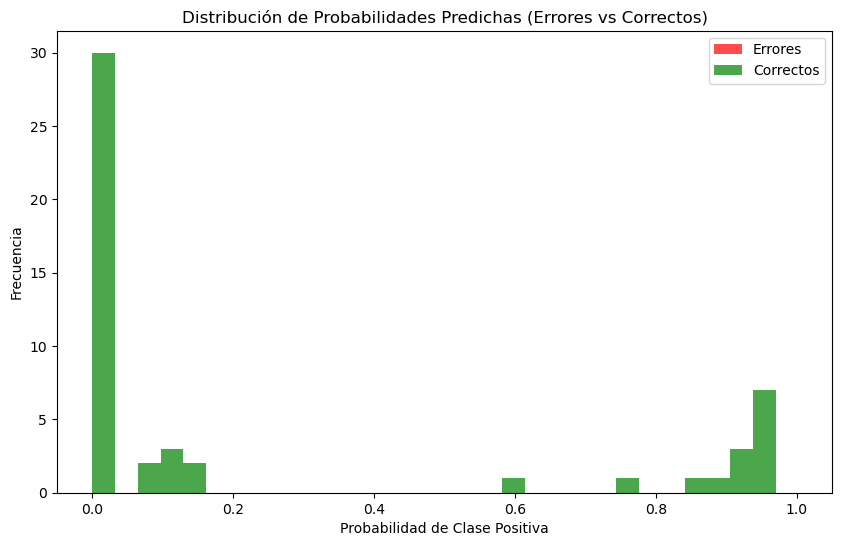

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Asumiendo que 'X_train' y 'y_train' ya están definidos y son tus datos de entrenamiento
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Ahora puedes hacer predicciones
predicciones = modelo.predict(X_test)
probabilidades = modelo.predict_proba(X_test)

# Calcula los errores
errores = predicciones != y_test

# Extraer probabilidades de la clase positiva (ajustar el índice de clase según sea necesario)
probabilidades_positivas = probabilidades[:, 1]  # Ajusta el índice si tu clase positiva está en otra posición

# Graficar las probabilidades de la clase positiva para errores
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(probabilidades_positivas[errores], bins=30, alpha=0.7, label='Errores', color='red')
plt.hist(probabilidades_positivas[~errores], bins=30, alpha=0.7, label='Correctos', color='green')
plt.title('Distribución de Probabilidades Predichas (Errores vs Correctos)')
plt.xlabel('Probabilidad de Clase Positiva')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()